<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Формирование-выборок:-обучающая,-валидационная,-тестовая" data-toc-modified-id="Формирование-выборок:-обучающая,-валидационная,-тестовая-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Формирование выборок: обучающая, валидационная, тестовая</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Техника-upsampling" data-toc-modified-id="Техника-upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Техника upsampling</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Техника-downsampling" data-toc-modified-id="Техника-downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Техника downsampling</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**
* Exited — факт ухода клиента

## Подготовка данных

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
warnings.filterwarnings("ignore") # уберем некритические предупреждения в коде

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

*Изучим данные*

In [ ]:
data.head() # выведем первые 5 строк данных

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
data.shape # сколько в DF строк и столбцов

(10000, 14)

In [ ]:
# приведем название столбцов к нижнему регистру
columns = data.columns
columns_new = []
for name in columns:
    columns_new.append(re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower())
columns_new

['row_number',
 'customer_id',
 'surname',
 'credit_score',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_cr_card',
 'is_active_member',
 'estimated_salary',
 'exited']

In [ ]:
data.set_axis(columns_new, axis='columns', inplace=True)

In [ ]:
data.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # колличество пропусков в %

,0
row_number,0.000000
customer_id,0.000000
surname,0.000000
credit_score,0.000000
geography,0.000000
gender,0.000000
age,0.000000
tenure,9.000000
balance,0.000000
num_of_products,0.000000


*В столбце 'Tenure' - сколько лет человек является клиентом банка, есть пропуски. В связи с тем что природа появления пропусков нам не известна и количество пропусков 9%, заполним их случайными значениями.*

In [ ]:
data['tenure'].value_counts() # посмотрим уникальные значения в столбце 'Tenure'

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

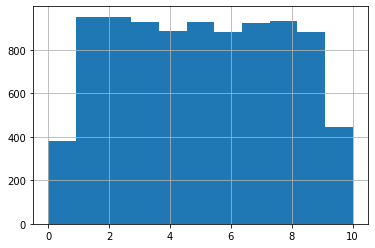

In [ ]:
# построим гистограмму по столбцу Tenure
data['tenure'].hist(bins=11)
plt.show()

In [ ]:
# заполним пропущенные значения случайными числами от 0 до 10
data_w = np.random.randint(0,10,size=data['tenure'].isna().sum())
data.loc[data['tenure'].isna(),'tenure'] = data_w

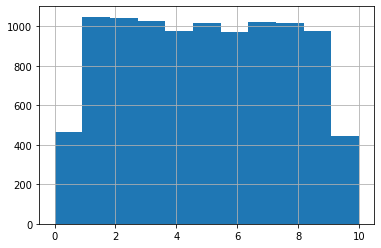

In [ ]:
# построим повторно гистограмму по столбцу Tenure и проверим распределение
data['tenure'].hist(bins=11)
plt.show()

In [ ]:
# так как все уникальные значения являются целыми числами, заменим тип данных на int64
data['tenure'] = data['tenure'].astype('int')

*Для нашей задачи столбцы RowNumber, CustomerId и Surname (порядковый номер, идентификатор, фамилия) не потребуются. В них слишком много уникальных значений. Уберем эти столбцы.*

In [ ]:
data.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True) # удалим столбцы

In [ ]:
# Проверим датафрейм на пропущенные значения
data.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [ ]:
#Проверим на дубликаты
data.duplicated().sum()

0

**Вывод:**
* Изучили и подготовили данные для дальнейшего исследования.
* Всего в таблице 10000 строк (наблюдений) и 13 столбцов, встречаются следующие типы данных: int64, float64, object.
* Привели название столбцов к нижнему регистру.
* Дубликатов нет.
* В столбце Tenure есть пропущенные значения. Причина появления пропусков нам не известна. Заменили пропуски случайным значением для сохранения распределения. Заменили тип данных на int64.
* Удалили столбцы 'RowNumber', 'CustomerId', 'Surname', так как они неинформативны как признаки и несут дополнительную нагрузку при анализе.


## Исследование задачи

In [ ]:
# основные статистические показатели для количественных данных
data.describe(include=np.number)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.953100,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894052,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# основные статистические показатели для количественных данных
data.describe(include=np.object)

,geography,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


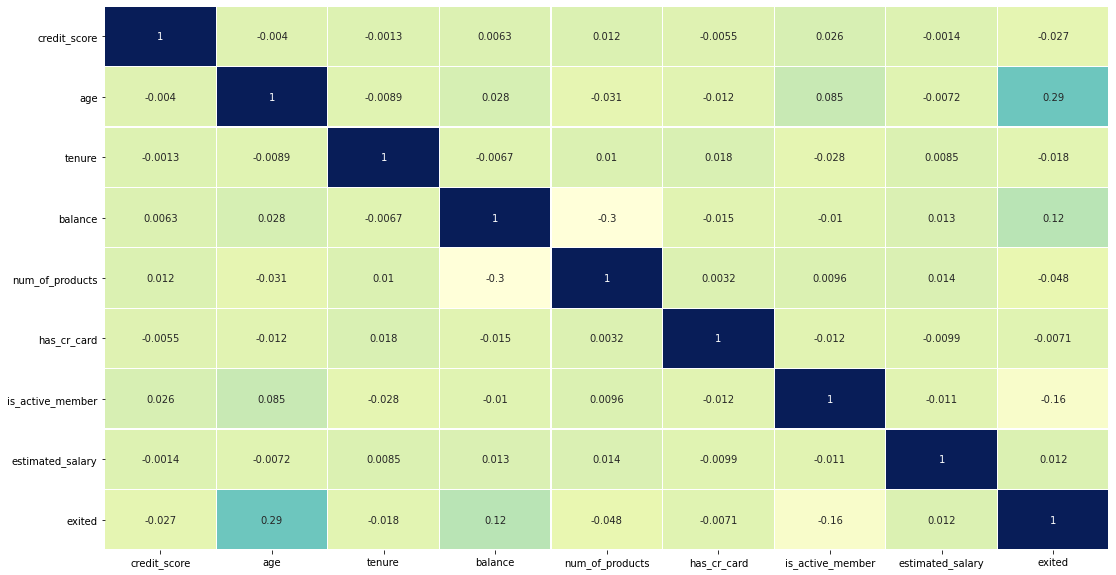

In [ ]:
# матрица корреляций
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

*Сильной прямой корреляции между оттоком нет ни с какими признаками. Есть небольшая положительная корреляция у таких признаков как возраст и баланс. Что показывает нам, что чем старше человек, тем больше Exited, а точнее 1. Так же и с балансом.*

In [ ]:
# применим OHE к датафрейму, чтобы избежать "дамми-ловушки" и позволит нам использовать
# модели дерево решений, случайный лес и логистическую регрессию.

data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Формирование выборок: обучающая, валидационная, тестовая

*Извлечем признаки и целевой признак*

In [ ]:
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']

*Разделим данные на обучающую, валидационную и тестовую выборки 3:1:1*

In [ ]:
# отделяем тестовую выборку
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)
# выделяем из валидационной обучающую
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=12345)

*Выведем размеры выборок*

In [ ]:
# размер обучающей выборки
print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


In [ ]:
# размер валидационной выборки
print(features_valid.shape)
print(target_valid.shape)

(2000, 11)
(2000,)


In [ ]:
# размер тестовой выборки
print(features_test.shape)
print(target_test.shape)

(2000, 11)
(2000,)


### Масштабирование признаков

In [ ]:
# стандартизируем численные признаки
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
492,-0.134048,-0.078068,4,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,5,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,1,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,2,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,7,0.813110,0.816929,1,1,0.801922,0,0,0


### Логистическая регрессия

*Найдём наилучшую модель LogisticRegression. Переберем гиперпараметры 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', и оценим качество модели на валидационной выборке.*

In [ ]:
best_model_lr = None
best_result_lr = 0
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for s in solver:
    model_lr = LogisticRegression(random_state=12345, solver=s, max_iter=10000).fit(features_train, target_train)
    predictions_valid_lr = model_lr.predict(features_valid)
    result_lr = accuracy_score(target_valid, predictions_valid_lr)
    if best_result_lr < result_lr:
        best_model_lr = model_lr
        best_result_lr = result_lr
        best_s = s

print('Качество модели:', best_result_lr)
print('Лучший гиперпараметр:', best_s)

Качество модели: 0.815
Лучший гиперпараметр: newton-cg


*На первый взгляд качество модели высокое. Посмотрим на баланс классов.*

0    0.9295
1    0.0705
dtype: float64


<AxesSubplot:>

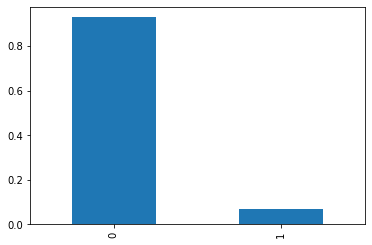

In [ ]:
predicted_valid_lr = pd.Series(predictions_valid_lr)

class_frequency_lr = predicted_valid_lr.value_counts(normalize=True)
print(class_frequency_lr)
class_frequency_lr.plot(kind='bar')

*Наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели, поэтому мы не можем использовать Accuracy для оценки качества модели.*

In [ ]:
# Построим матрицу ошибок для логистической регрессии.
print(confusion_matrix(target_valid, predicted_valid_lr))

[[1549   60]
 [ 310   81]]


*Много отрицательных ответов там, где их нет.*

*Изучим полноту, точность, F1-меру и AUC-ROC.*

In [ ]:
def rec_prec_f1(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, prediction))

In [ ]:
rec_prec_f1(target_valid, predictions_valid_lr)

Полнота 0.2071611253196931
Точность 0.574468085106383
F1-мера 0.30451127819548873
AUC-ROC 0.5849354414665587


*Низкое значение F-1 и AUC-ROC говорит нам о том, что данный метод классификации работает плохо и мы не достигли нужного нам результата.*

###  Решающее дерево

*Найдём наилучшую модель. Переберем гиперпараметр 'max_depth' и оценим качество модели на валидационной выборке.*

In [ ]:
best_model_dc = None
best_depth_dc = 0
best_result_dc = 0
for depth in range(1, 21):
    model_dc = DecisionTreeClassifier(random_state=12345, max_depth = depth).fit(features_train, target_train)
    predictions_valid_dc = model_dc.predict(features_valid)
    result_dc = accuracy_score(target_valid, predictions_valid_dc)
    if best_result_dc < result_dc:
        best_model_dc = model_dc
        best_depth_dc = depth
        best_result_dc = result_dc

print('Глубина дерева:', best_depth_dc)
print('Качество модели:', best_result_dc)


Глубина дерева: 6
Качество модели: 0.8595


*На первый взгляд качество модели высокое. Посмотрим на баланс классов.*

0    0.795
1    0.205
dtype: float64


<AxesSubplot:>

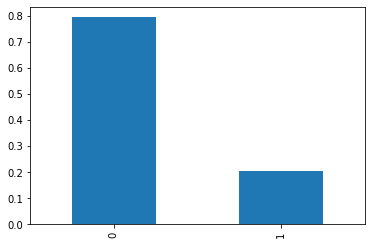

In [ ]:
predicted_valid_dc = pd.Series(predictions_valid_dc)

class_frequency_dc = predicted_valid_dc.value_counts(normalize=True)
print(class_frequency_dc)
class_frequency_dc.plot(kind='bar')

*Наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели, поэтому мы не можем использовать Accuracy для оценки качества модели.*

In [ ]:
# Построим матрицу ошибок для дерева решений.
print(confusion_matrix(target_valid, predictions_valid_dc))

[[1390  219]
 [ 200  191]]


*Много отрицательных ответов там, где их нет.*

*Изучим полноту, точность, F1-меру и AUC-ROC.*

In [ ]:
rec_prec_f1(target_valid, predictions_valid_dc)

Полнота 0.4884910485933504
Точность 0.4658536585365854
F1-мера 0.4769038701622972
AUC-ROC 0.6761908319411749


*Значения F-1 и AUC-ROC уже выше, модель с большей вероятностью предсказывает верные ответы. Требуемы результат не достигнут.*

###  Случайный лес

*Найдём наилучшую модель. Переберем гиперпараметры 'n_estimators' и 'max_depth', и оценим качество модели на валидационной выборке.*

In [ ]:
best_model_rc = None
best_est_rc = 0
best_depth_rc = 0
best_result_rc = 0
for est in range(10, 101, 10):
    for depth in range(1, 21):
        model_rc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth).\
        fit(features_train, target_train)
        predictions_valid_rc = model_rc.predict(features_valid)
        result_rc = accuracy_score(target_valid, predictions_valid_rc)
        if best_result_rc < result_rc:
            best_model_rc = model_rc
            best_est_rc = est
            best_depth_rc = depth
            best_result_rc = result_rc
print('Количество деревьев:', best_est_rc)
print('Глубина дерева:', best_depth_rc)
print('Качество модели:', best_result_rc)

Количество деревьев: 60
Глубина дерева: 10
Качество модели: 0.8665


*На первый взгляд качество модели высокое. Посмотрим на баланс классов.*

0    0.888
1    0.112
dtype: float64


<AxesSubplot:>

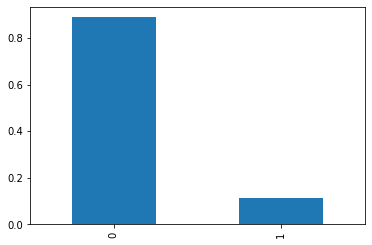

In [ ]:
predicted_valid_rc = pd.Series(predictions_valid_rc)

class_frequency_rc = predicted_valid_rc.value_counts(normalize=True)
print(class_frequency_rc)
class_frequency_rc.plot(kind='bar')

*Наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели, поэтому мы не можем использовать Accuracy для оценки качества модели.*

In [ ]:
# Построим матрицу ошибок для случайного леса.
print(confusion_matrix(target_valid, predictions_valid_rc))

[[1554   55]
 [ 222  169]]


*Много отрицательных ответов там, где их нет.*

*Изучим полноту, точность, F1-меру и AUC-ROC.*

In [ ]:
rec_prec_f1(target_valid, predictions_valid_rc)

Полнота 0.4322250639386189
Точность 0.7544642857142857
F1-мера 0.5495934959349593
AUC-ROC 0.6990211708754622


*Значения F-1 и AUC-ROC уже выше, модель с большей вероятностью предсказывает верные ответы. Требуемы результат не достигнут.*

**Вывод:**
* Изучили основные статистические показатели.
* Построили матрицу корреляций. Линейных зависимостей между численными признаками, которые влияли бы на целевой признак, не обнаружено.
* Применили прямое кодирование, преобразовав категориальные признаки в количественные.
* Разделили данные на признаки и целевой признак, и на обучающую, валидационную и тестовую выборки 3:1:1.
* Стандартизировали данные.
* Исследовали модели Decision Tree Classifier, RandomForestClassifier и Logistic Regression, однако наблюдается дисбаланс классов, поэтому метрика Accurasy не подходит для оценки качества модели.
* Посчитали значение F1-меры для исследуемых моделей, но нужного результата не было достигнуто.


## Борьба с дисбалансом

### Техника upsampling

*Применим технику upsampling для взвешивания классов.*

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

#### Логистическая регрессия

In [ ]:
model_lr = LogisticRegression(random_state=12345, solver='newton-cg')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_valid_lr)

print("F1:", f1_lr)

F1: 0.4043956043956044


*Метрика F1 увеличилась, но не достигла нужных нам результатов.*

AUC-ROC 0.773604039935211


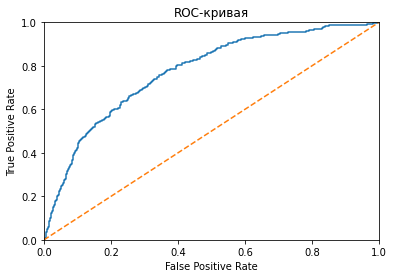

In [ ]:
# построим ROC-кривую для логистической регрессии
probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_lr)

# посчитаем для логистической регрессии AUC-ROC
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)
print('AUC-ROC', auc_roc_lr)

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

*Наша модель больше 0,5 и меньше 1, что говорит о том, что предсказывать она умеет, но не идеально.*

#### Решающее дерево

In [ ]:
model_dc = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_dc.fit(features_upsampled, target_upsampled)
predicted_valid_dc = model_dc.predict(features_valid)
f1_dc = f1_score(target_valid, predicted_valid_dc)

print("F1:", f1_dc)

F1: 0.46984572230014027


*Метрика F1 увеличилась, но не достигла нужных нам результатов.*

AUC-ROC 0.821860411146381


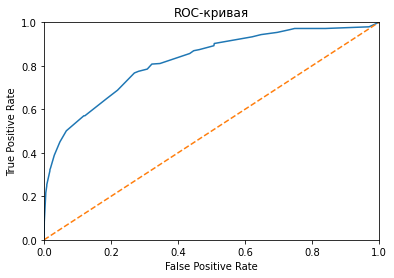

In [ ]:
# построим ROC-кривую для дерева решений
probabilities_valid_dc = model_dc.predict_proba(features_valid)
probabilities_one_valid_dc = probabilities_valid_dc[:, 1]

# посчитаем для дерева решений AUC-ROC
auc_roc_dc = roc_auc_score(target_valid, probabilities_one_valid_dc)
print('AUC-ROC', auc_roc_dc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_dc)
plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

*Наша модель больше 0,5 и меньше 1, что говорит о том, что предсказывать она умеет, но не идеально.*

#### Случайный лес

In [ ]:
model_rc = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=14)
model_rc.fit(features_upsampled, target_upsampled)
predicted_valid_rc = model_rc.predict(features_valid)
f1_rc = f1_score(target_valid, predicted_valid_rc)

print("F1:", f1_rc)

F1: 0.5707491082045185


*Метрика F1 увеличилась и не достигла нужных нам результатов.*

AUC-ROC 0.8377270436912572


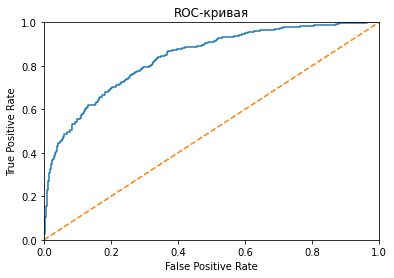

In [ ]:
# построим ROC-кривую для случайного леса
probabilities_valid_rc = model_rc.predict_proba(features_valid)
probabilities_one_valid_rc = probabilities_valid_rc[:, 1]


# посчитаем для случайного леса AUC-ROC
auc_roc_rc = roc_auc_score(target_valid, probabilities_one_valid_rc)
print('AUC-ROC', auc_roc_rc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_rc)

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

*Наша модель больше 0,5 и меньше 1, что говорит о том, что предсказывать она умеет, но не идеально.*

### Техника downsampling

*Применим технику downsampling для взвешивания классов.*

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

#### Логистическая регрессия

In [ ]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid_lr_downsampled = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_valid_lr)

print("F1:", f1_lr)

F1: 0.4043956043956044


AUC-ROC 0.7730858549813311


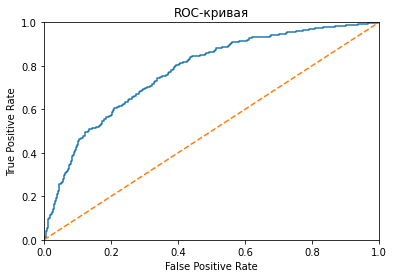

In [ ]:
# построим ROC-кривую для логистической регрессии
probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_lr)

# посчитаем для логистической регрессии AUC-ROC
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)
print('AUC-ROC', auc_roc_lr)

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

*Значения F1 и AUC-ROC не изменились.*

#### Решающее дерево

In [ ]:
model_dc = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_dc.fit(features_downsampled, target_downsampled)
predicted_valid_dc = model_dc.predict(features_valid)
f1_dc = f1_score(target_valid, predicted_valid_dc)

print("F1:", f1_dc)

F1: 0.46872753414809487


AUC-ROC 0.7969438214391872


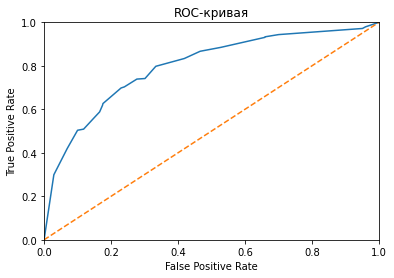

In [ ]:
# построим ROC-кривую для дерева решений
probabilities_valid_dc = model_dc.predict_proba(features_valid)
probabilities_one_valid_dc = probabilities_valid_dc[:, 1]

# посчитаем для дерева решений AUC-ROC
auc_roc_dc = roc_auc_score(target_valid, probabilities_one_valid_dc)
print('AUC-ROC', auc_roc_dc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_dc)
plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

*Значения F1 и AUC-ROC стали хуже.*

#### Случайный лес

In [ ]:
model_rc = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=14)
model_rc.fit(features_downsampled, target_downsampled)
predicted_valid_rc = model_rc.predict(features_valid)
f1_rc = f1_score(target_valid, predicted_valid_rc)

print("F1:", f1_rc)

F1: 0.4732620320855615


AUC-ROC 0.8315255142508811


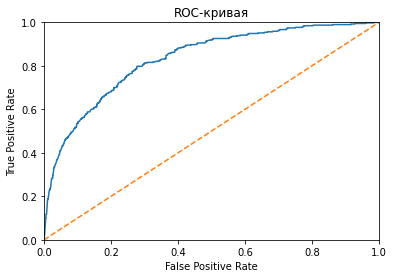

In [ ]:
# построим ROC-кривую для случайного леса
probabilities_valid_rc = model_rc.predict_proba(features_valid)
probabilities_one_valid_rc = probabilities_valid_rc[:, 1]


# посчитаем для случайного леса AUC-ROC
auc_roc_rc = roc_auc_score(target_valid, probabilities_one_valid_rc)
print('AUC-ROC', auc_roc_rc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_rc)

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

*Значения F1 и AUC-ROC стали хуже. Но Случайный лес показывает лучший результат с применением downsampling.*

## Тестирование модели

In [ ]:
def rec_prec_f1(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))

In [ ]:
model_rc = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=14)
model_rc.fit(features_upsampled, target_upsampled)
model_rc_test = model_rc
predictions_test_rc = model_rc_test.predict(features_test)
rec_prec_f1(target_test, predictions_test_rc)

Полнота 0.6627634660421545
Точность 0.5775510204081633
F1-мера 0.6172300981461286


AUC-ROC: 0.8510535664037899


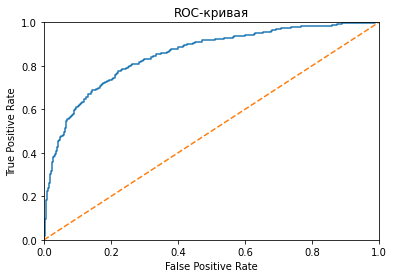

In [ ]:
# построим ROC-кривую для итоговой модели и посчитаем AUC-ROC
probabilities_valid_test = model_rc_test.predict_proba(features_test)
probabilities_one_valid_rc = probabilities_valid_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_rc)

print('AUC-ROC:',roc_auc_score(target_test, probabilities_one_valid_rc))

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Вывод:**

* Подготовлены данные для дальнейшего исследования.
* Проведены масштибирование, борьба с дисбалансом.
* Исследованы модели Decision Tree Classifier, RandomForestClassifier и Logistic Regression.
* Проведена работа с дисбалансом техникой upsampling и downsampling. Лучший результат показала upsampling.
* Наилучшую эффективность показала модель RandomForestClassifier с гиперпараметрами n_estimators равным = 70 и max_depth = 14.
* На тестовой выборке модель достигла заданой метрики (F1 > 0.59) и показала адекватные результаты.
* Модель характеризуется достаточным показателем полноты равным 0.66 (min = 0, max = 1), поэтому она с достаточной вероятностью предскажет уход клиента из банка.
* Показатель точности равен 0.59 (min = 0, max = 1) — модель верно предсказывает больше половины ухода клиентов.
* Значение AUC-ROC = 0.85 говорит о том, что модель умеет предсказывать.

